# 2022.07.14-Ver1.0: Mixing Mirai-Hajime-e435 and Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
#Function1: Get data and delete rows
def getdat(path):
    dataframe = pd.read_csv(path)
    del dataframe['TTL']
    #del dataframe['DPORT']
    del dataframe['SRCIP']
    return dataframe[:2000]

In [16]:
# Read Malware.csv File
e435  = getdat("./01_data/e435_20160328.pcap.csv")
mirai = getdat("./01_data/Mirai.csv")
hajime = getdat("./01_data/Hajime2.csv")

data = pd.concat([e435, mirai, hajime], ignore_index=True)
hajime.head(10)

,IPID,DSTIP,SPORT,DPORT,TSEQ,WINDS
0,33025,3390657767,45808,23,141164544,14600
1,12430,3390657856,40271,23,3541041152,14600
2,3221,3390657944,5622,23,1619853312,14600
3,16081,3390658451,33225,23,2336948224,14600
4,10478,3390658035,57677,23,3083010048,14600
5,30420,3390656562,24613,23,3438149632,14600
6,13740,3390658523,31267,23,4241883136,14600
7,21101,3390657910,29992,23,611909632,14600
8,9982,3390657831,57501,23,3936813056,14600
9,3352,3390658045,32659,23,3044868096,14600


# エルボー法

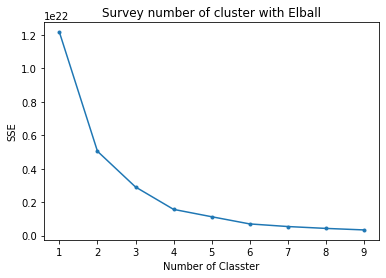

In [244]:
#エルボー法
#tol: Consider about it（収束と判断できる相対的誤差） 
X = data
max_cluster = 10
SSE = []
for i in range(1,max_cluster):
    #インスタンス
    kmeans = KMeans(n_clusters = i,      #クラスタの個数
                    init = 'k-means++',  #k平均++法によりクラスタ中心を選択
                    n_init= 5,           #異なるセントロイドの初期値を用いたk平均法アルゴリズム実行回数
                    max_iter=350,        #k平均法アルゴリズム内部の最大イテレーション(サイクル繰り返し)回数
                    tol=1e-20,           #収束と判定できる相対的許容誤差
                    random_state = 42    #セントロイド初期化に際して、用いる乱数生成器の設定
                   ) 
    
    #演算
    kmeans.fit(X)
    #wcss値に変換＆リスト格納
    SSE.append(kmeans.inertia_)
    
#可視化
plt.plot(range(1,max_cluster), SSE, marker= ".")
plt.title('Survey number of cluster with Elball')
plt.xlabel('Number of Classter')
plt.ylabel('SSE')
plt.show()

# クラスタリング Kmeans

In [11]:
#Import package
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib import cm
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [12]:
def scattering(dframe, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(3390656513, 3390658559)
    ax.set_ylim(3390656513, 3390658559)
    
    plt.scatter(dframe['DSTIP'], dframe['TSEQ'], s = 5, label = title)
    plt.title('Mapping Clustering Result')
    plt.xlabel('DSTIP')
    plt.ylabel('TSEQ')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [13]:
def pairing(dframe, title):
    g = sns.pairplot(data = dframe, corner=True)
    g.fig.suptitle(title)

In [17]:
#Fixing Data
data_array = np.array([data['IPID'].tolist(),
                       data['DSTIP'].tolist(),
                       data['SPORT'].tolist(),
                       data['DPORT'].tolist(),
                       data['TSEQ'].tolist(),
                       data['WINDS'].tolist()
                      ], np.int32)
#行列を転置
#標準化する
sc.fit(data_array)
data_array_norm = sc.transform(data_array)
data_array = data_array.T
X = data_array

In [27]:
#k-meansインスタンス
kmeans = KMeans(n_clusters = 5,      #クラスタの個数
                init = 'k-means++',  #k平均++法によりクラスタ中心を選択
                n_init= 5,          #異なるセントロイドの初期値を用いたk平均法アルゴリズム実行回数
                max_iter=300,        #k平均法アルゴリズム内部の最大サイクル繰り返し回数
                tol=1e-30,           #収束判定する相対的許容誤差
                random_state = 100   #セントロイド初期化に際して、用いる乱数シードを設定
               ) 

#演算
y_kmeans = kmeans.fit_predict(X)
#print(y_kmeans)
#配列情報
cluster_labels = np.unique(y_kmeans)               #一意なクラスター要素
print(cluster_labels)
n_clusters = cluster_labels.shape[0]               #配列の長さ
#print(n_clusters)

[0 1 2 3 4]


In [28]:
print(data.tail(2))

       IPID       DSTIP  SPORT  DPORT        TSEQ  WINDS
5998  32259  3390657356  10146     23  3793354752  14600
5999  45421  3390658108  65161     23  2149122048  14600


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

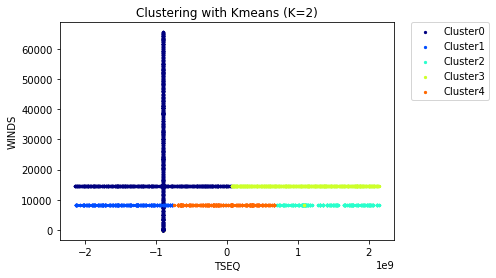

In [29]:
#グラフ可視化
for i in range(len(cluster_labels)):
    color = cm.jet(float(i) / n_clusters)
    plt.scatter(X[y_kmeans == i, 4], X[y_kmeans == i, 5], s = 5, c = color, label = 'Cluster'+str(i))

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Clustering with Kmeans (K=2)')
plt.xlabel('TSEQ')
plt.ylabel('WINDS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

In [255]:
#ラベルを取得し、別列で追加
data['cluster_id'] = y_kmeans
counter = 0
#count = data['cluster_id'].value_counts()

#各グループのデータを取得する
group0 = data.loc[data['cluster_id'] ==0]
group1 = data.loc[data['cluster_id'] ==1]
group2 = data.loc[data['cluster_id'] ==2]
#group3 = data.loc[data['cluster_id'] ==3]

#クラスタフィーリドを削除
del group0['cluster_id']
del group1['cluster_id']
del group2['cluster_id']

print("Group\t", len(group0))
print(group0.head(3))
print("Group\t", len(group1))
print(group1.head(10))
print("Group\t", len(group2))
print(group2.head(3))
#del group3['cluster_id']

Group	 2993
    IPID       DSTIP  SPORT        TSEQ  WINDS
40  1125  2927752184  52040  3015507238   8192
41  1125  2927752184  52040  3015507238   8192
42  1134  3427780043  52041  4271267484   8192
Group	 1017
       IPID       DSTIP  SPORT        TSEQ  WINDS
2       422  3427780043  52021   264886999   8192
3       422  3427780043  52021   264886999   8192
28      701  2511225672  52034  1081780393   8192
29      701  2511225672  52034  1081780393   8192
36      772   401288953  52038   539907355   8192
37      772   401288953  52038   539907355   8192
4000  33025  3390657767  45808   141164544  14600
4002   3221  3390657944   5622  1619853312  14600
4008  21101  3390657910  29992   611909632  14600
4011  47452  3390657000  27780   213188825   5840
Group	 1990
   IPID       DSTIP  SPORT        TSEQ  WINDS
0   418  1752595690  52020   541297399   8192
1   418  1752595690  52020   541297399   8192
4   506  1752593565  52022  1547640497   8192


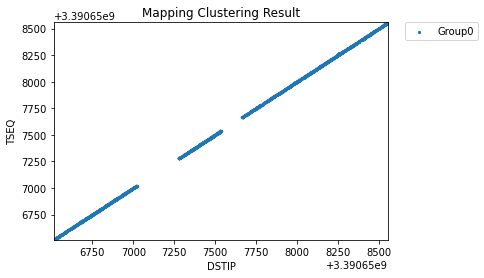

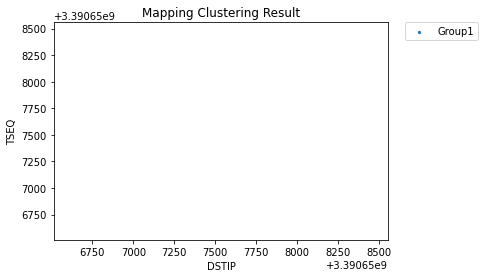

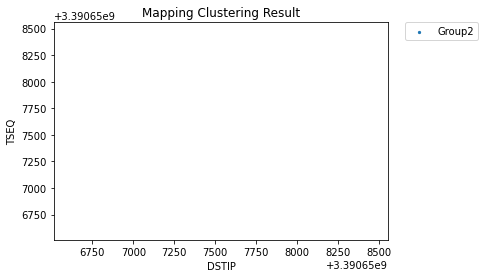

In [212]:
# Plotting
scattering(group0, "Group0")
#scattering(group1, "Group1")
#scattering(group2, "Group2")

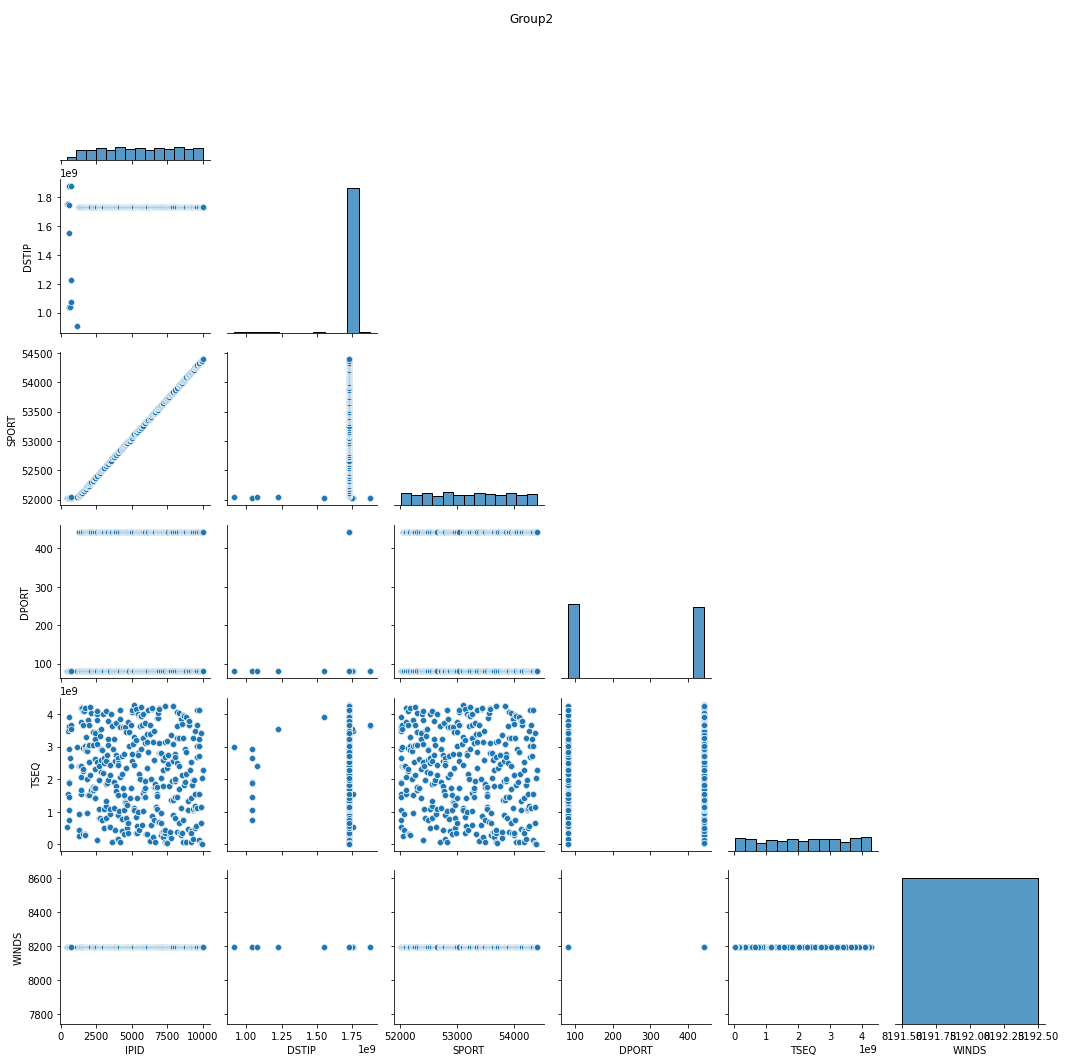

In [224]:
# Paring
#pairing(group0, "Group0")
#pairing(group1, "Group1")
pairing(group2, "Group2")

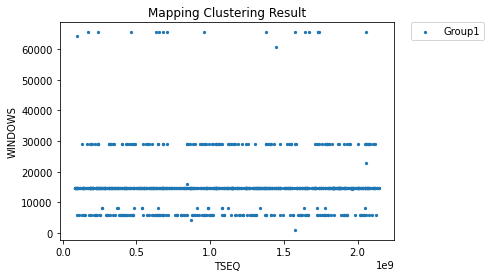

In [226]:
plt.scatter(group1['TSEQ'], group1['WINDS'],s = 5, label = "Group1") #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'red', label = 'Centroids')
plt.title('Mapping Clustering Result')
plt.xlabel('TSEQ')
plt.ylabel('WINDOWS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()